# PHYS 381 - Assignment #3
#### February 12, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

## Introduction
This week we will be looking at the details involved with performing integration using python.

There are many functions within SciPy that will take care of the integration details, such as the quad function. However, our goal is to get an underlyling understanding of the process. To begin, we went through the details of using the well known trapazoidal approximation for evaluating an integral. This analysis revealed that two important aspects of numerical integration are the number of divisions and the error involved. We will keep these at the top of our list throughout our analysis.

The goal is to use Scipy's romberg function to compute the value of the following triple integral.


$$ \int_{x=0}^1 \int_{y=0}^\sqrt{1-x^2} \int_{z=0}^\sqrt{1-x^2-y^2} \frac{dz \, dy \, dx}{1 + x^2 + y^2 + z^2} $$

After getting comfortable with using the romberg function to take a single integral, we noted that the task at hand was to determine how perform consecutive integrations using a function that can only do one at a time.

The solution to this problem is to create a chain of integrations. In the first integral, the function called inside romberg is the second integral. The second integral evaluates romberg with the thrid integral. Finally, the third integral calls romberg with the integrand.

The following chunck of code defines the functions necessary to evaluate a triple integral given input bounds.

In [5]:
import scipy.integrate as integrate
import scipy

def tripleIntegral(integrandFunction, xLowBound, xHighBound, yLowBound, yHighBound, zLowBound, zUpBound, tol = 1e-6, divmax = 100, isShow = False):
    """
    This function computes a triple integral given an integrand function, numerical bounds on the outermost function (x),
    and function bounds on the second inner and innermost functions, with the input expected to be arranged in (y, x) order.
    
    Parameters:
        integrandFunction: The function to be integrated over.
        xLowBound: Number corrisponding to the outer x integral lower bound.
        xHighBound: Number corrisponding to the outer x integral higher bound.
        yLowBound: Function corrisponding to the second inner y integral lower bound.
        yHighBound: Function corrisponding to the second inner y integral higher bound.
        zLowBound: Function corrisponding to the innermost z integral lower bound.
        zUpBound: Function corrisponding to the innermost z integral higher bound.
        tol: Integration tolerances for all three integrations, as fed into the scipy.integrate.romberg function.
        divmax: divmax tolerances for all three integrations, as fed into the scipy.integrate.romberg function.
        isShow: Show the triangular integration matrix for the romberg function, for all integrals.
        
    
    Returns:
        The numerical result of the triple integral.
    """
    def outerIntegral(x):
        low, high = yLowBound(x), yHighBound(x)
        return integrate.romberg(innerIntegral, low, high, args=(x,), tol = tol, divmax = divmax, show = isShow)
    def innerIntegral(y,x):
        low, high = zLowBound(y,x), zUpBound(y,x)
        return integrate.romberg(integrandFunction, low, high, args=(y,x), tol = tol, divmax = divmax, show = isShow)
    return integrate.romberg(outerIntegral, xLowBound, xHighBound, tol = tol, divmax = divmax, show = isShow)

In [6]:

def zeroFunction(x = 0, y = 0, z = 0):
    """
    Zero function which takes any three parameters and just returns zero.
    
    Parameters:
        x, y, z: any three parameters, exist for generality sake in case some
        function wants to substitute things into this function without knowing
        beforehand that it does not need to or cannot. Meant for the triple
        integral function above.
    Returns:
        0, the integer value.
    """
    return 0

def middleCartesianHigherBounds(x):
    """
    For the cartesian integrand function, the upper bounds of the middle integral
    is calculated with this function. Note that due to floating point imprecision
    issues, the returned value might sometimes be outside the intended bounds.
    
    Since this function is not meant to be a general use function, but rather
    was made specifically for the case of that one integral, fixing it with an
    absolute value
    
    Parameters:
        x: corrisponds to the x value as subbed in by the outer integral loop.
    Returns:
        The value of the upper limit evaluated at the given x value.
    """
    return abs(1-x**2)**(1/2)

def innerCartesianHigherBounds(y,x):
    """
    For the cartesian integrand function, the upper bounds of the inner integral
    is calculated with this function. Note that due to floating point imprecision
    issues, the returned value might sometimes be outside the intended bounds.
    
    Since this function is not meant to be a general use function, but rather
    was made specifically for the case of that one integral, fixing it with an
    absolute value
    
    Parameters:
        y: corrisponds to the y value as subbed in by the middle interal loop.
        x: corrisponds to the x calue as subbed in by the outer integral loop.
    Returns:
    """
    return abs(1-x**2-y**2)**(1/2)

def cartesianFunction(z,y,x):
    """
    The cartesian form of the integrand function as desired by the problem.
    
    Parameters:
        z: Corrisponds to the z value to be subbed in from the innermost loop.
        y: Corrisponds to the y value to be subbed in from the middle loop.
        x: Corrisponds to the x value to be subbed in from the outermost loop.
    Returns:
        A value corrisponding to the integrand evalulated at the given
        x, y and z variables.
    
    """
    cartesianFunction.numOfIterations += 1
    return 1/(1+x**2+y**2+z**2)
#Function attributes need to be defined after defining a function, else odd things happen.
cartesianFunction.numOfIterations = 0

In [8]:
print("Result of the Cartesian Triple Integral:", tripleIntegral(cartesianFunction, 0, 1, zeroFunction, middleCartesianHigherBounds, zeroFunction, innerCartesianHigherBounds))

Result of the Cartesian Triple Integral: 0.337095361376


In [10]:
def halfPiFunction(z=0,y=0,x=0):
    """
    Similar to the zero function, takes up to three arbitrary parameters
    and returns a constant value, in this case pi/2.
    
    Parameters:
        z, y, x: Parameters corrisponding to the subbed in z, y, x values
        during integration, though it actually doesn't matter what's subbed
        in since it's not used. As before, these slots exist to allow the
        integral function to be fully general.
    Returns:
        scipy.pi/2 as a floating point value.
    """
    return scipy.pi/2
def oneFunction(z=0,y=0,x=0):
    """
    Similar to the zero function, takes up to three arbitrary parameters
    and returns a constant value, in this case 1.
    
    Parameters:
        z, y, x: Parameters corrisponding to the subbed in z, y, x values
        during integration, though it actually doesn't matter what's subbed
        in since it's not used. As before, these slots exist to allow the
        integral function to be fully general.
    Returns:
        1.
    """
    return 1
def sphericalFunction(p, theta, phi):
    """
    The spherical form of the integrand function as desired by the problem.
    
    Parameters:
        z: Corrisponds to the z value to be subbed in from the innermost loop.
        y: Corrisponds to the y value to be subbed in from the middle loop.
        x: Corrisponds to the x value to be subbed in from the outermost loop.
    Returns:
        A value corrisponding to the integrand evalulated at the given
        x, y and z variables.
    """
    sphericalFunction.numOfIterations += 1
    return p**2*scipy.sin(phi)/(1+p**2)
#Function attributes need to be defined after the function, else odd things happen.
sphericalFunction.numOfIterations = 0

In [11]:
print("Result of the Spherical Triple Integral:", tripleIntegral(sphericalFunction, 0, scipy.pi/2, zeroFunction, halfPiFunction, zeroFunction, oneFunction))

Result of the Spherical Triple Integral: 0.33709577581


In [12]:
import matplotlib.pyplot as plt
import numpy

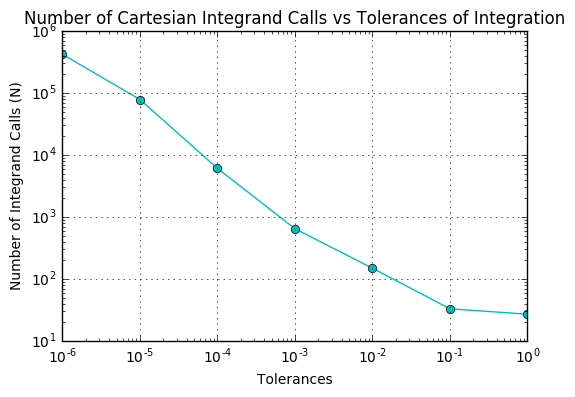

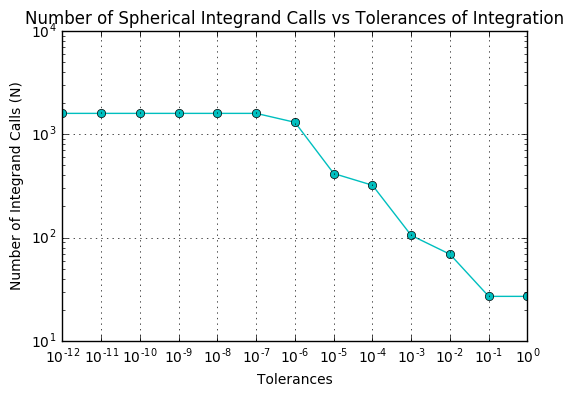

In [17]:
def getNumOfIntegrandCalls(tol, isCartesian):
    """
    This function, given a tolorance setting and an indication of if we're using
    the cartesian or spherical coordinate function determines how many integrand
    calls occured before we get the result. It's specific to the two functions
    made above unfortunately.
    
    Parameters:
         tol: A number such as 1e-6 for the purposes of determining error tolerance
         to substitute into our integral calculation calls.
         isCartesian: A boolean flag variable for determining if to use the cartesian
         function or the spherical function.
    Returns:
        numOfCalls: The number of calls to the integrand function.
    """
    numOfCalls = 0
    if isCartesian:
        cartesianFunction.numOfIterations = 0
        tripleIntegral(cartesianFunction, 0, 1, zeroFunction, middleCartesianHigherBounds, zeroFunction, innerCartesianHigherBounds, tol = tol)
        numOfCalls = cartesianFunction.numOfIterations
    else:
        sphericalFunction.numOfIterations = 0
        tripleIntegral(sphericalFunction, 0, scipy.pi/2, zeroFunction, halfPiFunction, zeroFunction, oneFunction, tol = tol)
        numOfCalls = sphericalFunction.numOfIterations
    return numOfCalls

def createTolVsIntegrandCallsPlot(tolerances, isCartesian = True):
    """
    This function, given an input list of tolerances and an indication of which graph we
    want (cartesian or spherical), will plot a graph of the number of times the integrand
    was called versus the tolerance required.
    
    Parameters:
        tolerances: A list or numpy array of tolerances.
        isCartesian: A boolean control flag to determine if we want the graph
        for the cartesian form or the spherical form.
    """
    #Gets data points of the number of integrand calls needed for each
    #input tolerance level.
    numbersOfIterations = []
    for entry in tolerances:
        numbersOfIterations.append(getNumOfIntegrandCalls(entry, isCartesian))
        
    #Generates labels:
    label = ""
    if isCartesian:
        label = "Cartesian"
    else:
        label = "Spherical"
    #Sets up the chart, limiting size and specifying grid.
    plt.axis()
    plt.grid(True)

    #Labels and plots the chart.
    plt.xlabel("Tolerances")
    plt.ylabel("Number of Integrand Calls (N)")
    plt.title("Number of " + label + " Integrand Calls vs Tolerances of Integration")
    plt.loglog(tolerances, numbersOfIterations, "co-")
    plt.show()
createTolVsIntegrandCallsPlot([1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], True)
createTolVsIntegrandCallsPlot([1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12], False)
